In [44]:
import tensorflow as tf
from tensorflow import keras
import os 
import time
import string
import requests
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,Bidirectional,GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import ktrain
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Text Generation "The Nicomachean Ethics of Aristotle, by Aristotle".**

In [73]:
response = requests.get("https://www.gutenberg.org/files/8438/8438-0.txt")
data = response.text.split("\n")
data.index('Chapter I.\r')
data.index('BOOK X\r')
text = data[data.index('Chapter I.\r'):data.index('BOOK X\r')]
text = " ".join(text)


In [75]:
def generate_wordcloud(text):
  word_cloud = WordCloud(width=600,height=400,background_color="white").generate(text)
  plt.figure(figsize=(12,12),facecolor="white")
  plt.tight_layout(pad=0)
  plt.axis(False)
  plt.imshow(word_cloud,interpolation="bilinear")

In [76]:
def clean_text(text): 
    stop_words = stopwords.words("english")
    tokens = text.split() #Splitting text into tokens
    translator = str.maketrans("","",string.punctuation)
    tokens = [word.translate(translator) for word in tokens] #Removing all the punctuations
    tokens = [word.lower() for word in tokens if word.isalpha()] # Removing non-alphabetical words and lowering them.
    tokens = [word for word in tokens if word not in stop_words]
    text = " ".join(tokens)
    return tokens,text


In [77]:
tokens,text = clean_text(text)


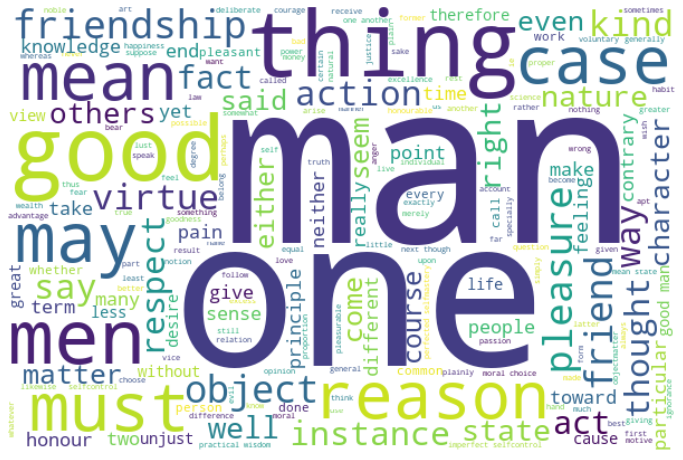

In [78]:
generate_wordcloud(text)

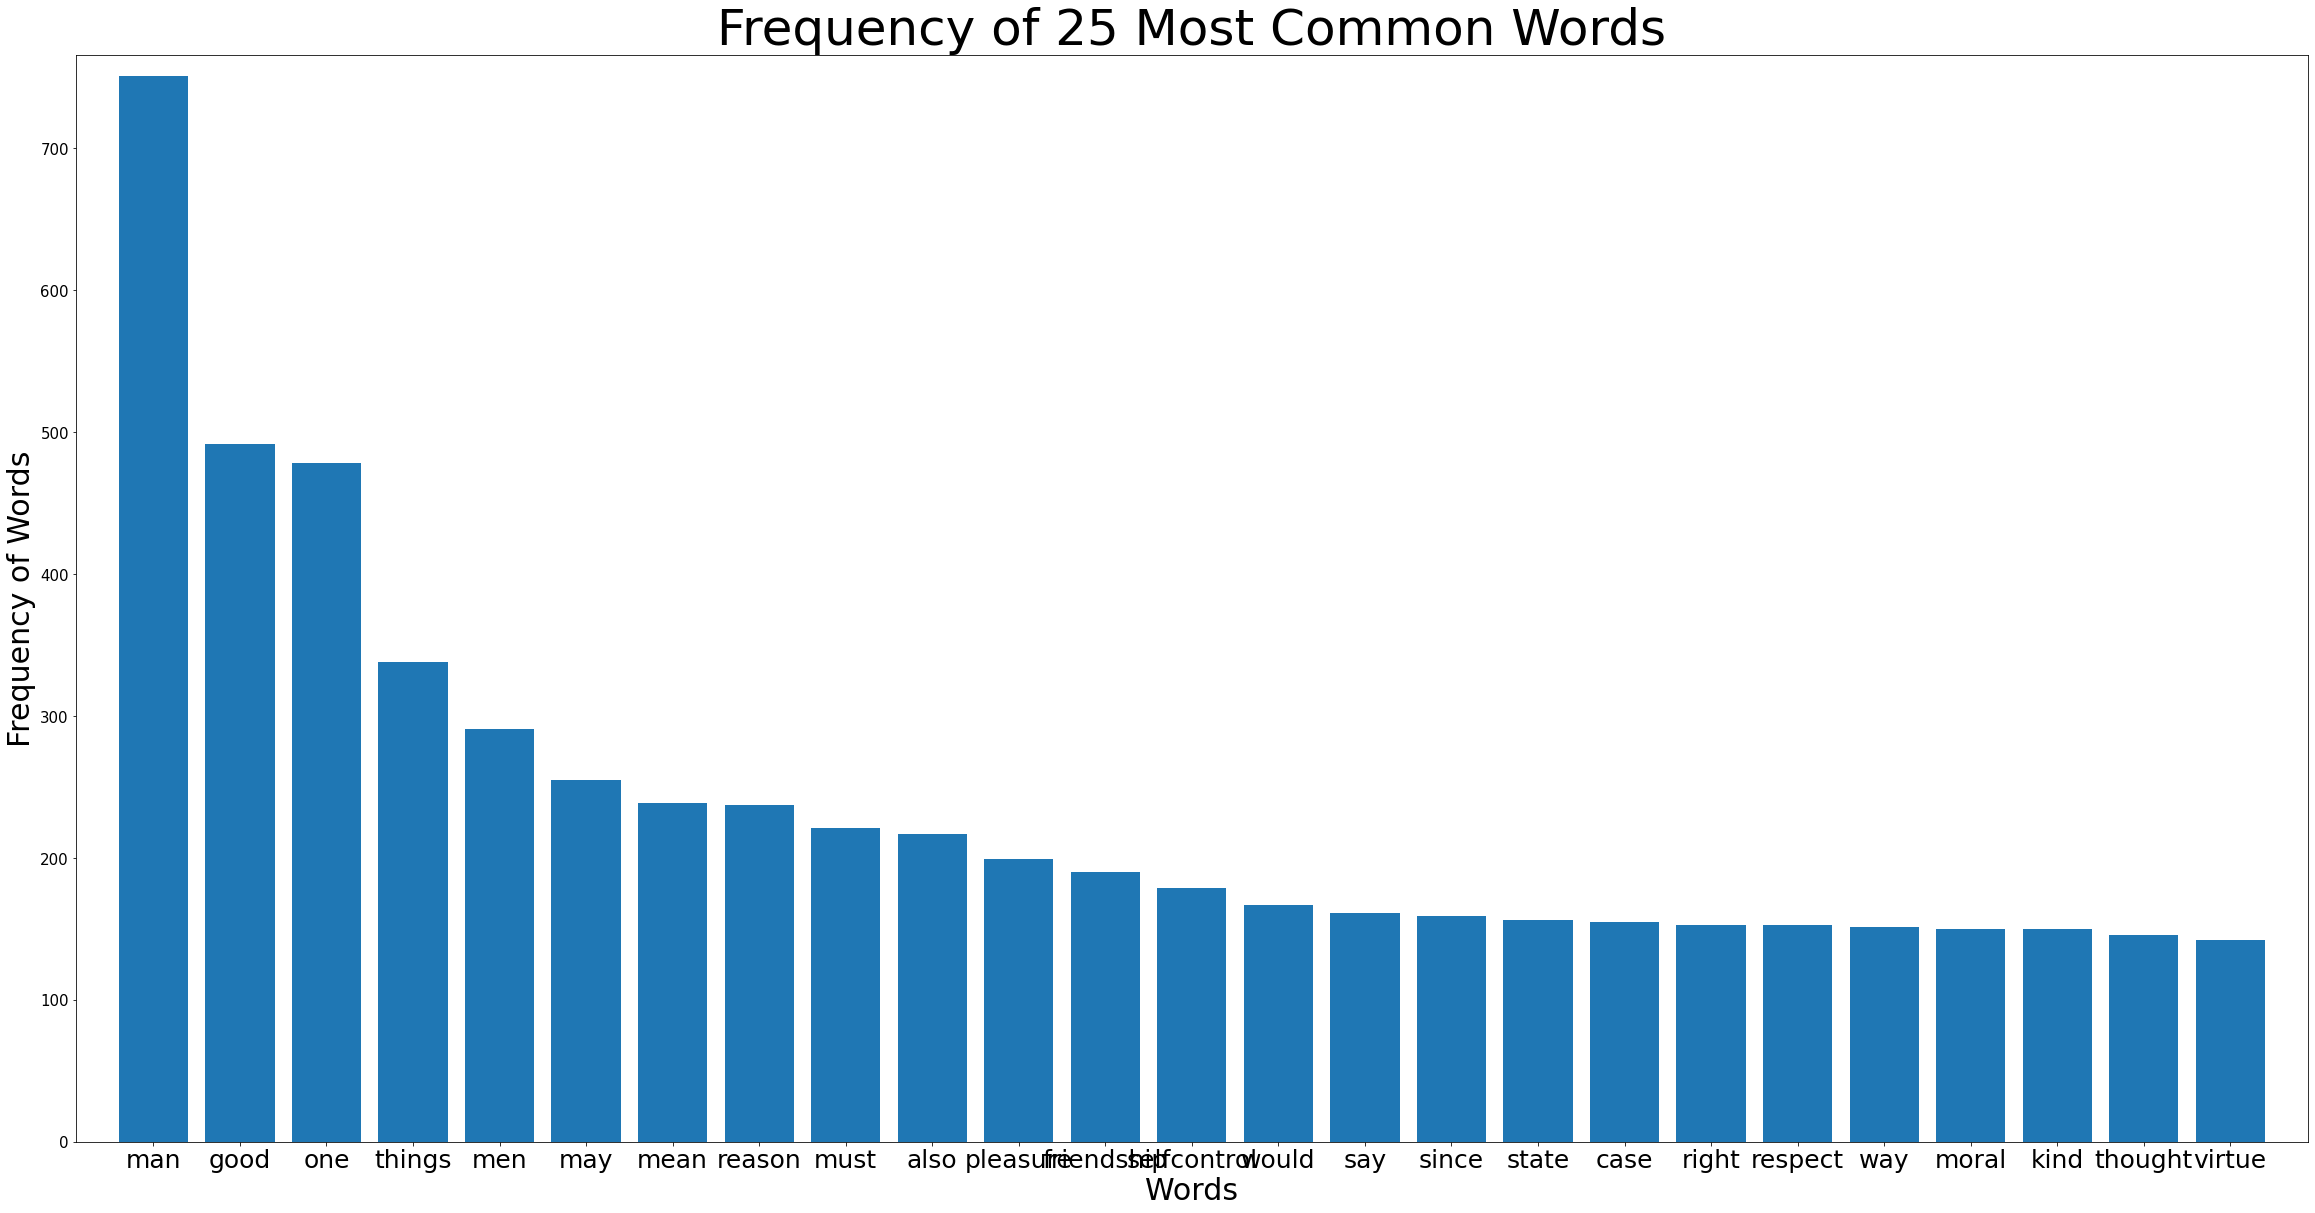

In [80]:
mostcommon_words = FreqDist(tokens).most_common(25)
word,value = zip(*mostcommon_words)

plt.figure(figsize=(40,20))
plt.margins(0.02)
plt.bar(word,value)
plt.xlabel("Words",fontsize=30)
plt.ylabel("Frequency of Words",fontsize=30)
plt.yticks(fontsize=15)
plt.xticks(fontsize=25)
plt.title("Frequency of 25 Most Common Words",fontsize=50)
plt.show()

In [81]:
def create_lines(length,text):
    lines = []
    for i in range(length,len(text)):
        sequence = text[i-length:i]
        line = " ".join(sequence)
        lines.append(line)

    return lines

In [ ]:
lines = create_lines(text=tokens,length=11)


In [83]:
def preprocessing(lines=None):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    sequences = tokenizer.texts_to_sequences(lines)
    sequences = np.array(sequences)

    vocabulary = len(tokenizer.word_index) + 1 #Because Tokenizer start at 1
    X, y = sequences[:,:-1],sequences[:,-1]
    sequence_length = X.shape[1]
    y = to_categorical(y,vocabulary)
    return X,y,vocabulary,sequence_length,tokenizer


In [84]:
X,y,vocabulary,seqence_length,tokenizer = preprocessing(lines=lines)

In [95]:
model = Sequential([Embedding(input_dim=vocabulary,output_dim=20,input_length=seqence_length),
                    LSTM(25,return_sequences=True),
                    LSTM(25,return_sequences=True),
                    LSTM(25),
                    Dense(15,activation="relu"),
                    Dense(vocabulary,activation="softmax")

])

In [ ]:
early_stop = keras.callbacks.EarlyStopping(patience=10)
model.compile(loss="categorical_crossentropy",optimizer="adam")
model.fit(X,y,epochs=100,callbacks=early_stop)

In [110]:
model.save("Aristotle.h5")

In [119]:
def prediction(seed_text=None,length=100,tokens=None,model=None):
    for _ in range(length):
        text_token = tokenizer.texts_to_sequences([seed_text])[0]
        tokens = pad_sequences([text_token],maxlen=seqence_length,padding="post")

        output = ""

        predicted = np.argmax(model.predict(tokens))
        for word,index in tokenizer.word_index.items():
            if predicted == index:
                output = word
        seed_text  += " " + output
    return seed_text
            

In [98]:
seed_text = prediction(seed_text="Meaning of good",length=30,tokens=tokens,model=model)

In [99]:
seed_text

'Meaning of good citizens nothing keeping noblest hard afforded hard changed perceives afforded legislators law glory continuously befitting domestic things appearance painting partaken human meant excess justice horse good good friend may fact'

# **Text Generation "The Ethics, by Benedict de Spinoza".**

In [104]:
response_spinoza = requests.get("https://www.gutenberg.org/cache/epub/3800/pg3800.txt")
data_spinoza = response_spinoza.text.split("\n")
data_spinoza.index('PART I. CONCERNING GOD.\r')
data_spinoza.index('End of the Project Gutenberg EBook of The Ethics, by Benedict de Spinoza\r')
text_spinoza = data_spinoza[data_spinoza.index('PART I. CONCERNING GOD.\r'):data_spinoza.index('End of the Project Gutenberg EBook of The Ethics, by Benedict de Spinoza\r')]
text_spinoza = " ".join(text_spinoza)


In [105]:
tokens_spinoza,text_spinoza = clean_text(text_spinoza)


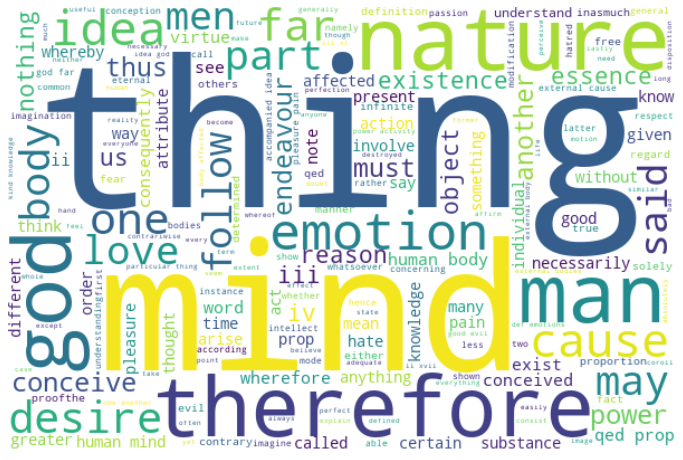

In [106]:
generate_wordcloud(text_spinoza)

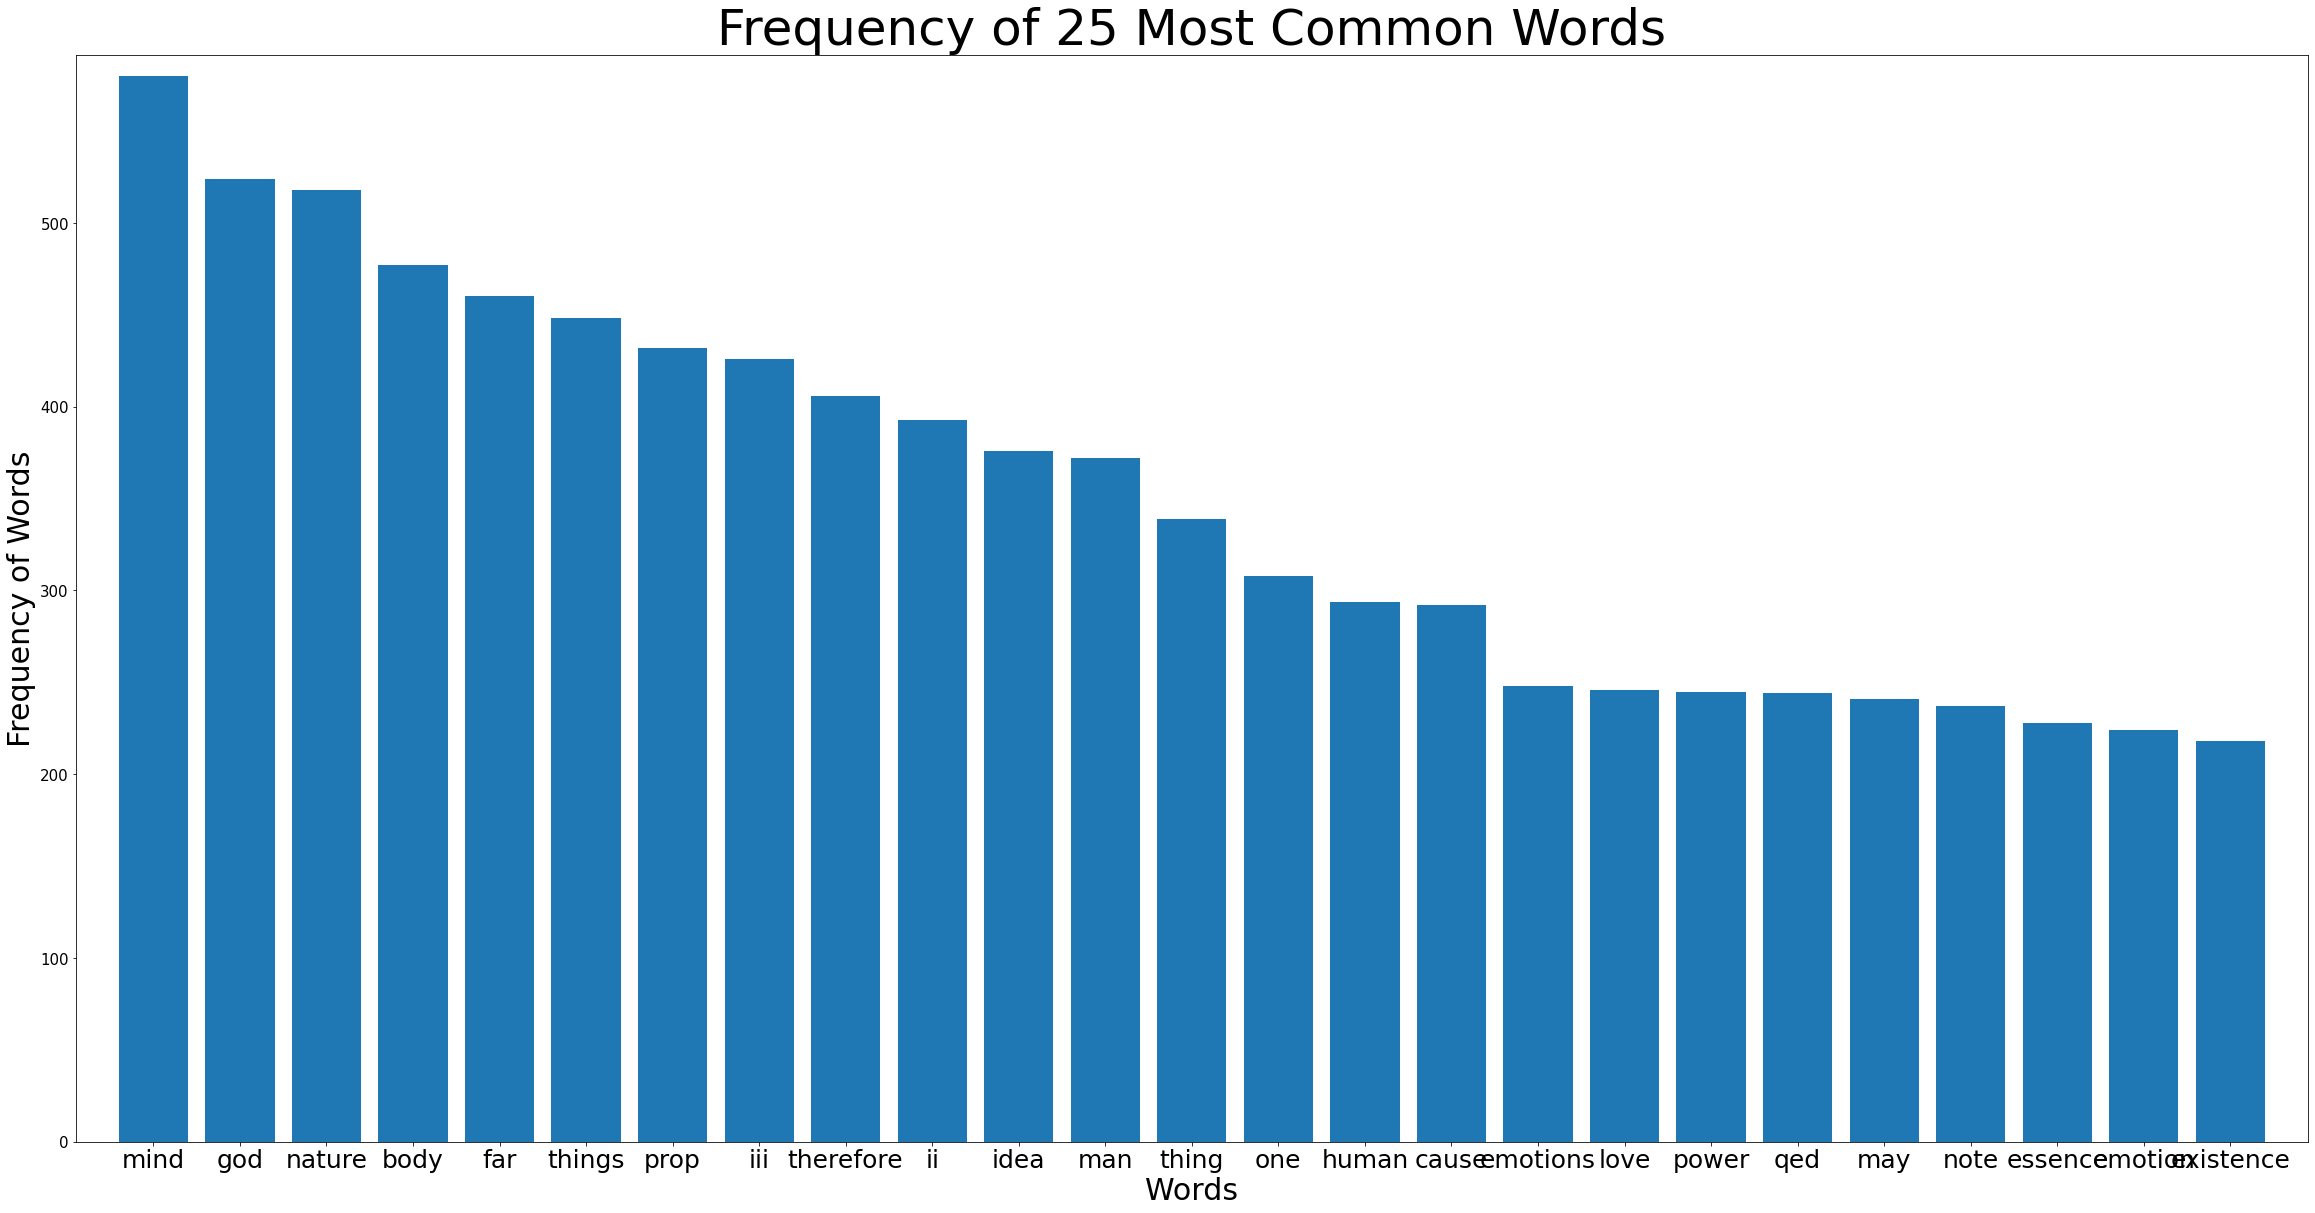

In [107]:
mostcommon_words = FreqDist(tokens_spinoza).most_common(25)
word,value = zip(*mostcommon_words)

plt.figure(figsize=(40,20))
plt.margins(0.02)
plt.bar(word,value)
plt.xlabel("Words",fontsize=30)
plt.ylabel("Frequency of Words",fontsize=30)
plt.yticks(fontsize=15)
plt.xticks(fontsize=25)
plt.title("Frequency of 25 Most Common Words",fontsize=50)
plt.show()

In [114]:
spinoza_lines = create_lines(text=tokens_spinoza,length=11)
X_spinoza,y_spinoza,vocabulary_spinoza,seqence_length_spinoza,tokenizer_spinoza = preprocessing(lines=spinoza_lines)

In [116]:
model_spinoza = Sequential([Embedding(input_dim=vocabulary,output_dim=20,input_length=seqence_length),
                    LSTM(25,return_sequences=True),
                    LSTM(25,return_sequences=True),
                    LSTM(25),
                    Dense(15,activation="relu"),
                    Dense(vocabulary,activation="softmax")

])

In [ ]:
early_stop = keras.callbacks.EarlyStopping(patience=10)
model_spinoza.compile(loss="categorical_crossentropy",optimizer="adam")
model_spinoza.fit(X,y,epochs=100,callbacks=early_stop)
model_spinoza.save("Spinoza.h5")

In [120]:
seed_text_spinoza = prediction(seed_text="Meaning of good",length=30,tokens=tokens,model=model_spinoza)

In [121]:
seed_text_spinoza

'Meaning of good nothing nothing nothing refined may may bear refined require man thought others knows called little using using using evils pleasantry unless strike rate man work judiciousness soul virtue working matter'